
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
pip install pandas numpy scikit-learn matplotlib graphviz


In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


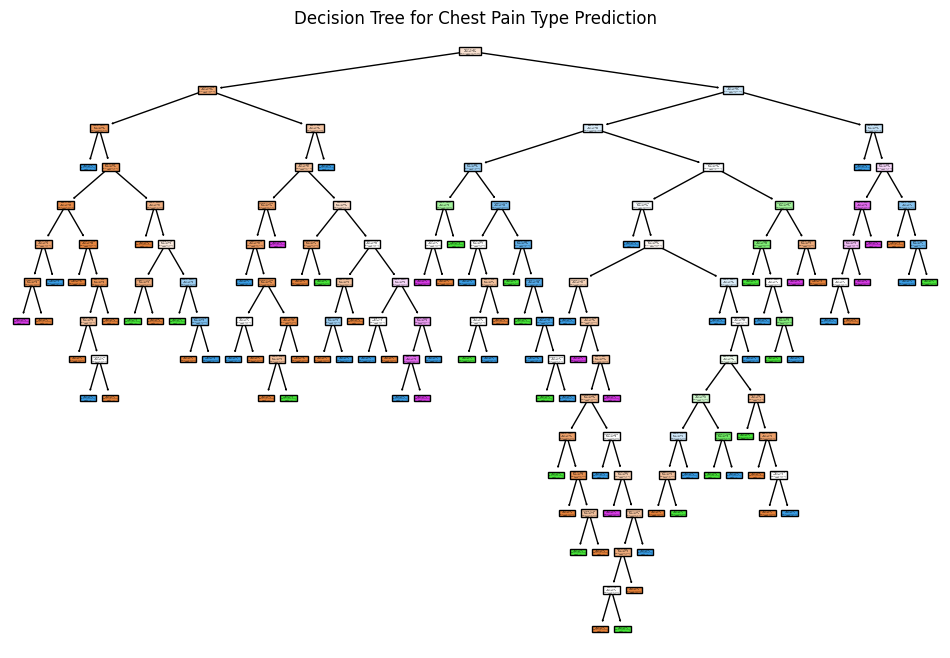

Decision Tree Rules:
 |--- output <= 0.50
|   |--- thalach <= 144.50
|   |   |--- chol <= 157.50
|   |   |   |--- class: 2
|   |   |--- chol >  157.50
|   |   |   |--- age <= 61.50
|   |   |   |   |--- age <= 49.50
|   |   |   |   |   |--- age <= 47.50
|   |   |   |   |   |   |--- trtbps <= 114.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- trtbps >  114.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  47.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- age >  49.50
|   |   |   |   |   |--- thalach <= 141.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- thalach >  141.50
|   |   |   |   |   |   |--- age <= 56.50
|   |   |   |   |   |   |   |--- chol <= 252.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- chol >  252.50
|   |   |   |   |   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- restecg >  0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

url = "https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1"
ha = pd.read_csv(url)

X = ha.drop('cp', axis=1)
y = ha['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=[str(i) for i in ha['cp'].unique()])
plt.title("Decision Tree for Chest Pain Type Prediction")
plt.show()

tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_predictions = lda_model.predict(X_test)

def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy:.4f}\nClassification Report:\n{report}\n")

evaluate_model(knn_predictions, "KNN")
evaluate_model(dt_predictions, "Decision Tree")
evaluate_model(lda_predictions, "Linear Discriminant Analysis")


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

url = "https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1"
ha = pd.read_csv(url)

for i in range(4):
    ha[f'cp_is_{i}'] = (ha['cp'] == i).astype(int)

X = ha.drop(['cp', 'cp_is_0', 'cp_is_1', 'cp_is_2', 'cp_is_3'], axis=1)
categories = ['cp_is_0', 'cp_is_1', 'cp_is_2', 'cp_is_3']

for category in categories:
    y = ha[category]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)

    lr_predictions = lr_model.predict(X_test)

    f1 = f1_score(y_test, lr_predictions)
    print(f"F1 Score for {category}: {f1:.4f}")
    print(f"Classification Report for {category}:\n{classification_report(y_test, lr_predictions)}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

F1 Score for cp_is_0: 0.6923
Classification Report for cp_is_0:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        29
           1       0.69      0.69      0.69        26

    accuracy                           0.71        55
   macro avg       0.71      0.71      0.71        55
weighted avg       0.71      0.71      0.71        55


F1 Score for cp_is_1: 0.0000
Classification Report for cp_is_1:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        43
           1       0.00      0.00      0.00        12

    accuracy                           0.78        55
   macro avg       0.39      0.50      0.44        55
weighted avg       0.61      0.78      0.69        55


F1 Score for cp_is_2: 0.1111
Classification Report for cp_is_2:
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        40
           1       0.33      0.07      0.11

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

<ipython-input-4-c431f45a75a4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ha_01[f'cp_is_{category_1}_vs_{category_2}'] = (ha_01['cp'] == category_1).astype(int)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-4-c431f45a75a4>:21: SettingWithCopyWarning: 
A value is trying

ROC-AUC for cp 0 vs cp 1: 0.6649
ROC-AUC for cp 0 vs cp 2: 0.9583
ROC-AUC for cp 0 vs cp 3: 1.0000


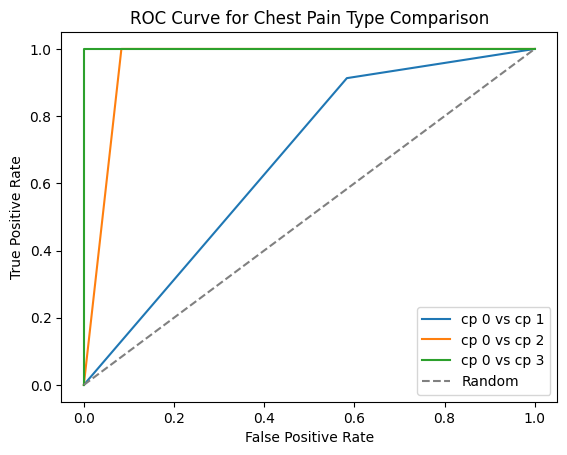

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

url = "https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1"
ha = pd.read_csv(url)

ha_01 = ha[ha['cp'].isin([0, 1])]

pairs = [(0, 1), (0, 2), (0, 3)]

for pair in pairs:
    category_1, category_2 = pair

    ha_01[f'cp_is_{category_1}_vs_{category_2}'] = (ha_01['cp'] == category_1).astype(int)

    X = ha_01.drop(['cp', f'cp_is_{category_1}_vs_{category_2}'], axis=1)
    y = ha_01[f'cp_is_{category_1}_vs_{category_2}']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)

    lr_predictions = lr_model.predict(X_test)

    roc_auc = roc_auc_score(y_test, lr_predictions)
    print(f"ROC-AUC for cp {category_1} vs cp {category_2}: {roc_auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, lr_predictions)
    plt.plot(fpr, tpr, label=f'cp {category_1} vs cp {category_2}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Chest Pain Type Comparison')
plt.legend()
plt.show()
